#ANALISIS DEL DATASET
Conjunto de datos de ventas de automóviles: modelos, características y precios Car Sales Dataset: Model, Features, and Pricing

https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as labelencoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv("/content/car_sales_data.csv")
display(df)


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


# EDA PARA EL DATASET

## Inspección inicial del dataset

### Subtask:
Mostrar información general del dataset, como el número de filas y columnas, tipos de datos y valores nulos.


**Reasoning**:
Mostrar las primeras filas del DataFrame, información concisa del DataFrame y el número de valores nulos por columna para obtener una visión general del dataset.



In [ ]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del dataset:")
display(df.head())

# Mostrar información concisa del DataFrame
print("\nInformación del dataset:")
display(df.info())

# Mostrar el número de valores nulos por columna
print("\nNúmero de valores nulos por columna:")
display(df.isnull().sum())

Primeras filas del dataset:


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car_Age,Mileage_log,Price_log
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,23,11.754310,8.031060
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,11,10.576202,10.088846
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,37,12.258736,7.441907
4,VW,Polo,1.0,Petrol,2006,127869,4101,19,11.758769,8.319230
5,Ford,Focus,1.4,Petrol,2018,33603,29204,7,10.422400,10.282095



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 44134 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         44134 non-null  object 
 1   Model                44134 non-null  object 
 2   Engine size          44134 non-null  float64
 3   Fuel type            44134 non-null  object 
 4   Year of manufacture  44134 non-null  int64  
 5   Mileage              44134 non-null  int64  
 6   Price                44134 non-null  int64  
 7   Car_Age              44134 non-null  int64  
 8   Mileage_log          44134 non-null  float64
 9   Price_log            44134 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ MB


None


Número de valores nulos por columna:


,0
Manufacturer,0
Model,0
Engine size,0
Fuel type,0
Year of manufacture,0
Mileage,0
Price,0
Car_Age,0
Mileage_log,0
Price_log,0


## Estadísticas descriptivas

### Subtask:
Calcular estadísticas descriptivas para las columnas numéricas (media, desviación estándar, etc.) y categóricas (conteo de valores únicos, frecuencia, etc.).


**Reasoning**:
Calculate and display descriptive statistics for the numerical and categorical columns as requested by the subtask instructions.



In [ ]:
# Estadísticas descriptivas para columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
display(df[['Engine size', 'Year of manufacture', 'Mileage', 'Price']].describe())

# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas para columnas categóricas:")
for col in ['Manufacturer', 'Model', 'Fuel type']:
    print(f"\nColumna: {col}")
    display(df[col].describe())
    print(f"Frecuencia de los 10 valores más comunes en '{col}':")
    display(df[col].value_counts().head(10))


Estadísticas descriptivas para columnas numéricas:


,Engine size,Year of manufacture,Mileage,Price
count,44134.000000,44134.000000,44134.000000,44134.000000
mean,1.583867,2003.803530,113864.169371,10844.453551
std,0.397902,9.321475,67970.194688,10148.313360
min,1.000000,1984.000000,770.000000,206.000000
25%,1.200000,1996.000000,58558.750000,2865.000000
50%,1.600000,2004.000000,103603.500000,7064.000000
75%,1.800000,2012.000000,159382.000000,16276.750000
max,2.600000,2022.000000,314959.000000,42972.000000



Estadísticas descriptivas para columnas categóricas:

Columna: Manufacturer


,Manufacturer
count,44134
unique,5
top,Ford
freq,14649


Frecuencia de los 10 valores más comunes en 'Manufacturer':


,count
Manufacturer,
Ford,14649
VW,14642
Toyota,11712
BMW,2171
Porsche,960



Columna: Model


,Model
count,44134
unique,14
top,Golf
freq,4997


Frecuencia de los 10 valores más comunes en 'Model':


,count
Model,
Golf,4997
Polo,4957
Mondeo,4885
Fiesta,4883
Focus,4881
Passat,4688
Yaris,4065
Prius,3966
RAV4,3681



Columna: Fuel type


,Fuel type
count,44134
unique,3
top,Petrol
freq,21485


Frecuencia de los 10 valores más comunes en 'Fuel type':


,count
Fuel type,
Petrol,21485
Diesel,12196
Hybrid,10453


## Visualización de la distribución de variables

### Subtarea
Crear gráficos para visualizar la distribución de las variables clave como precio, tamaño del motor, kilometraje y año de fabricación.


Razonamiento: Crear histogramas para visualizar la distribución de las variables clave: «Precio», «Cilindrada», «Kilometraje» y «Año de fabricación».



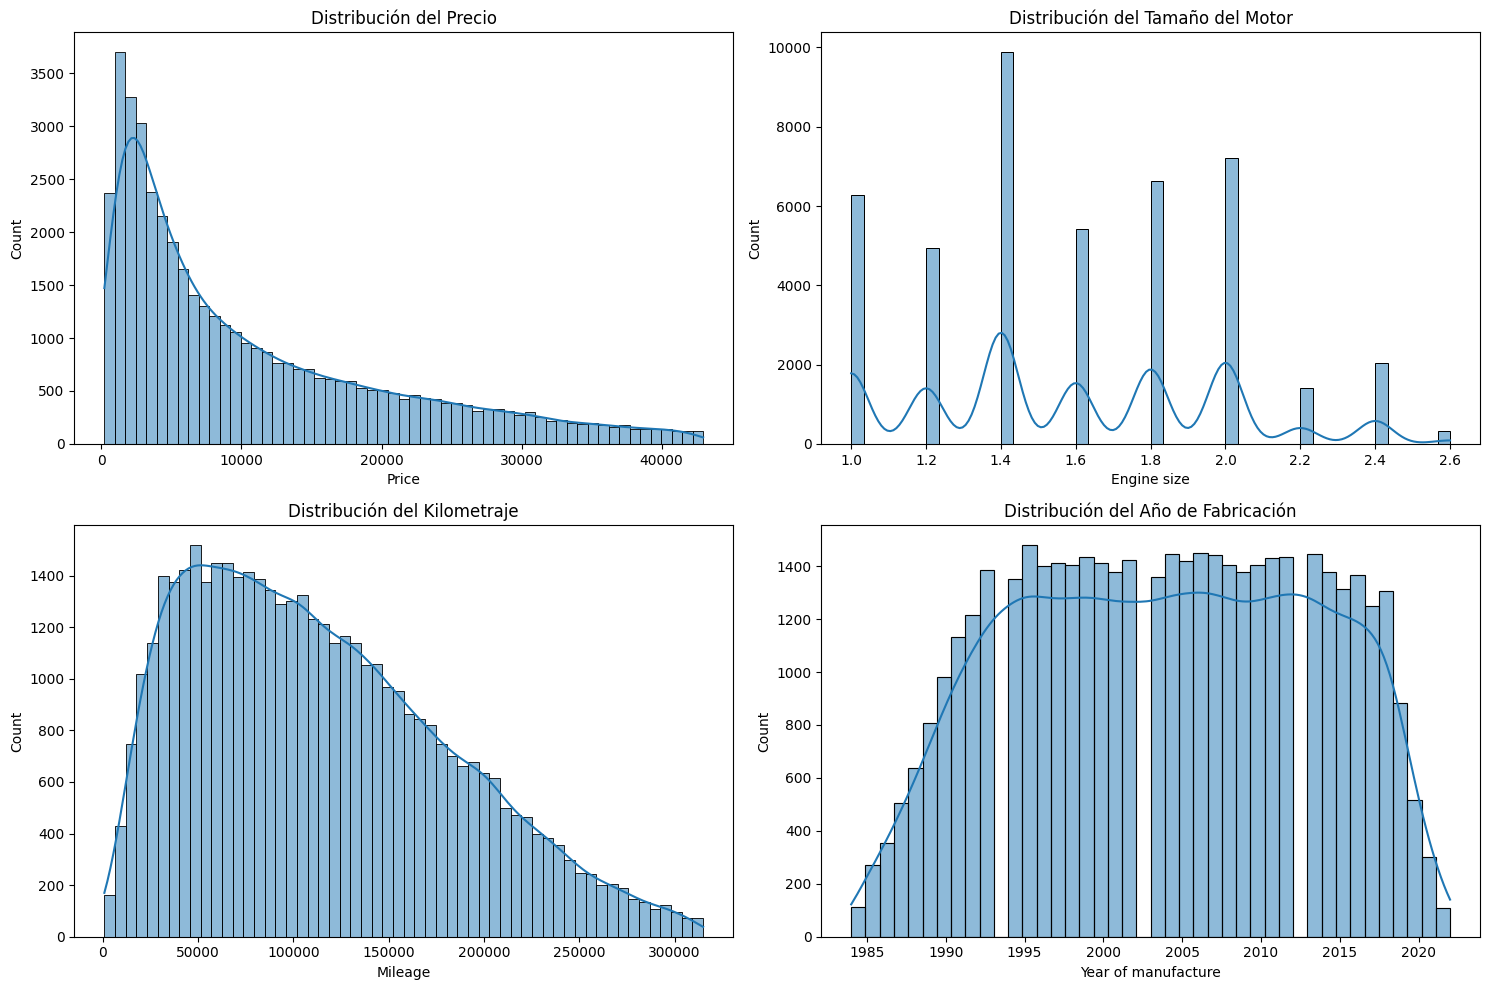

In [ ]:
# Crear histogramas para visualizar la distribución de las variables clave
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribución del Precio')

plt.subplot(2, 2, 2)
sns.histplot(df['Engine size'], kde=True)
plt.title('Distribución del Tamaño del Motor')

plt.subplot(2, 2, 3)
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribución del Kilometraje')

plt.subplot(2, 2, 4)
sns.histplot(df['Year of manufacture'], kde=True)
plt.title('Distribución del Año de Fabricación')

plt.tight_layout()
plt.show()

## Análisis de la relación entre variables

### Subtask:
Explorar la relación entre el precio y otras variables utilizando gráficos de dispersión o box plots.


**Reasoning**:
Crear gráficos de dispersión para explorar la relación entre el precio y el tamaño del motor, el kilometraje y el año de fabricación, así como ajustar el diseño de los gráficos.



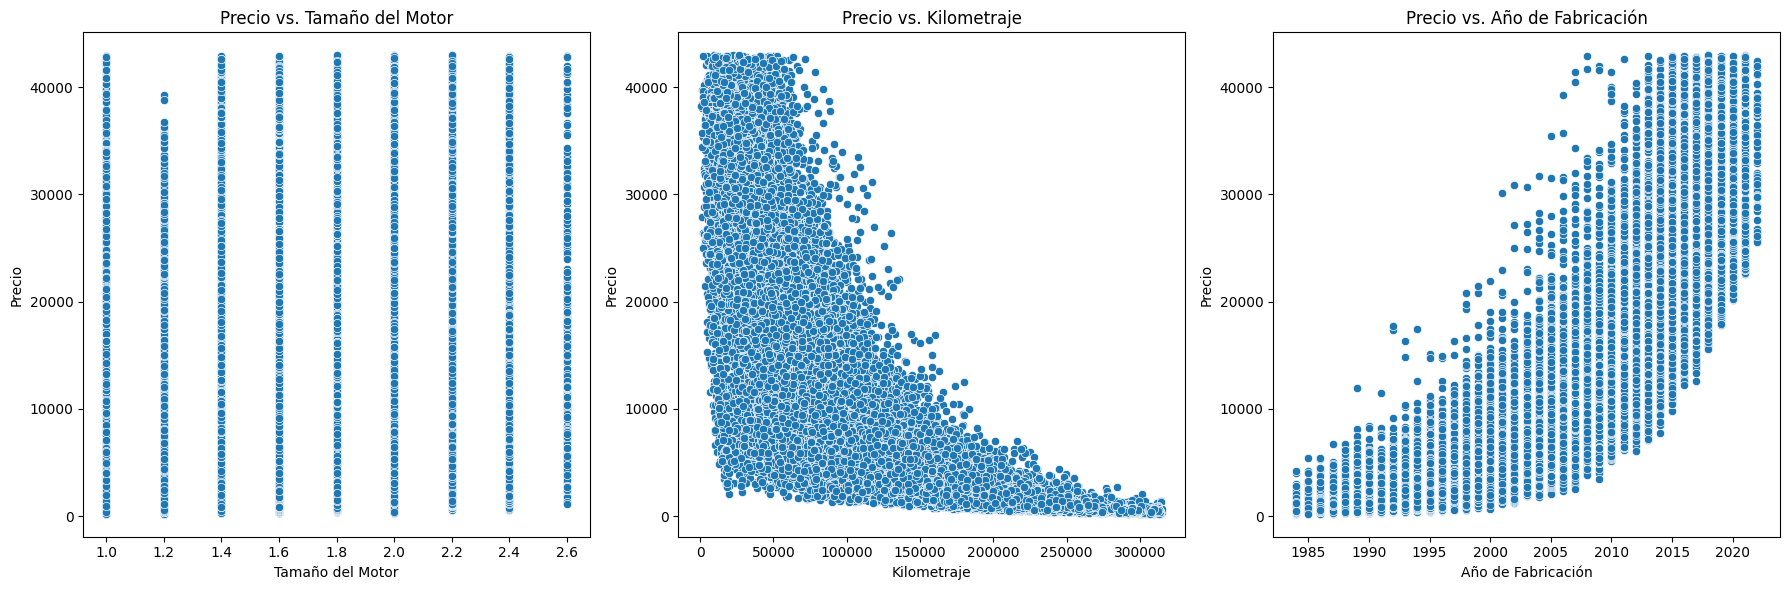

In [ ]:
plt.figure(figsize=(18, 6))

# Gráfico de dispersión entre Precio y Tamaño del Motor
plt.subplot(1, 3, 1)
sns.scatterplot(x='Engine size', y='Price', data=df)
plt.title('Precio vs. Tamaño del Motor')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Precio')

# Gráfico de dispersión entre Precio y Kilometraje
plt.subplot(1, 3, 2)
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Precio vs. Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')

# Gráfico de dispersión entre Precio y Año de Fabricación
plt.subplot(1, 3, 3)
sns.scatterplot(x='Year of manufacture', y='Price', data=df)
plt.title('Precio vs. Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

## Análisis de variables categóricas

### Subtask:
Visualizar la distribución de las variables categóricas como fabricante y tipo de combustible.


**Reasoning**:
Crear gráficos de barras para visualizar la distribución de las variables categóricas 'Manufacturer' y 'Fuel type'.



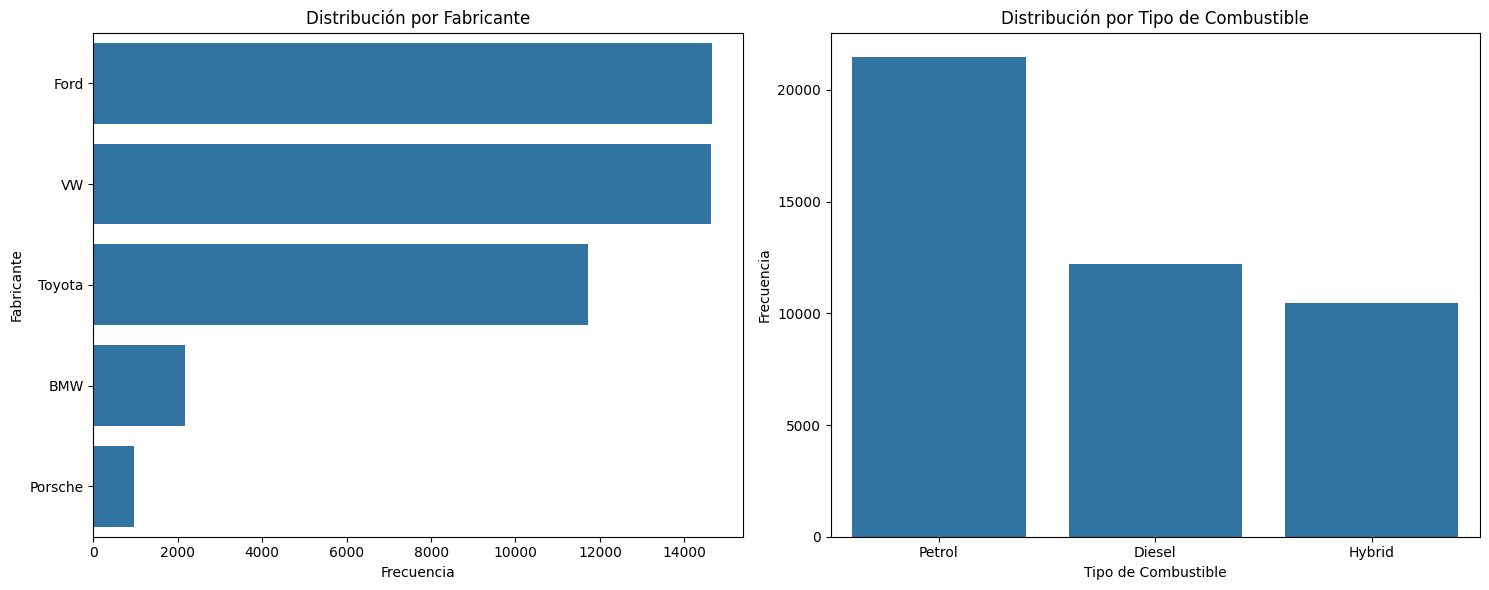

In [ ]:
# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 6))

# Gráfico de barras para la distribución de 'Manufacturer'
plt.subplot(1, 2, 1)
sns.countplot(y='Manufacturer', data=df, order = df['Manufacturer'].value_counts().index)
plt.title('Distribución por Fabricante')
plt.xlabel('Frecuencia')
plt.ylabel('Fabricante')

# Gráfico de barras para la distribución de 'Fuel type'
plt.subplot(1, 2, 2)
sns.countplot(x='Fuel type', data=df, order = df['Fuel type'].value_counts().index)
plt.title('Distribución por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Análisis de valores atípicos

### Subtask:
Identificar posibles valores atípicos en las variables numéricas.


**Reasoning**:
Crear box plots para identificar visualmente los valores atípicos en las columnas numéricas especificadas.



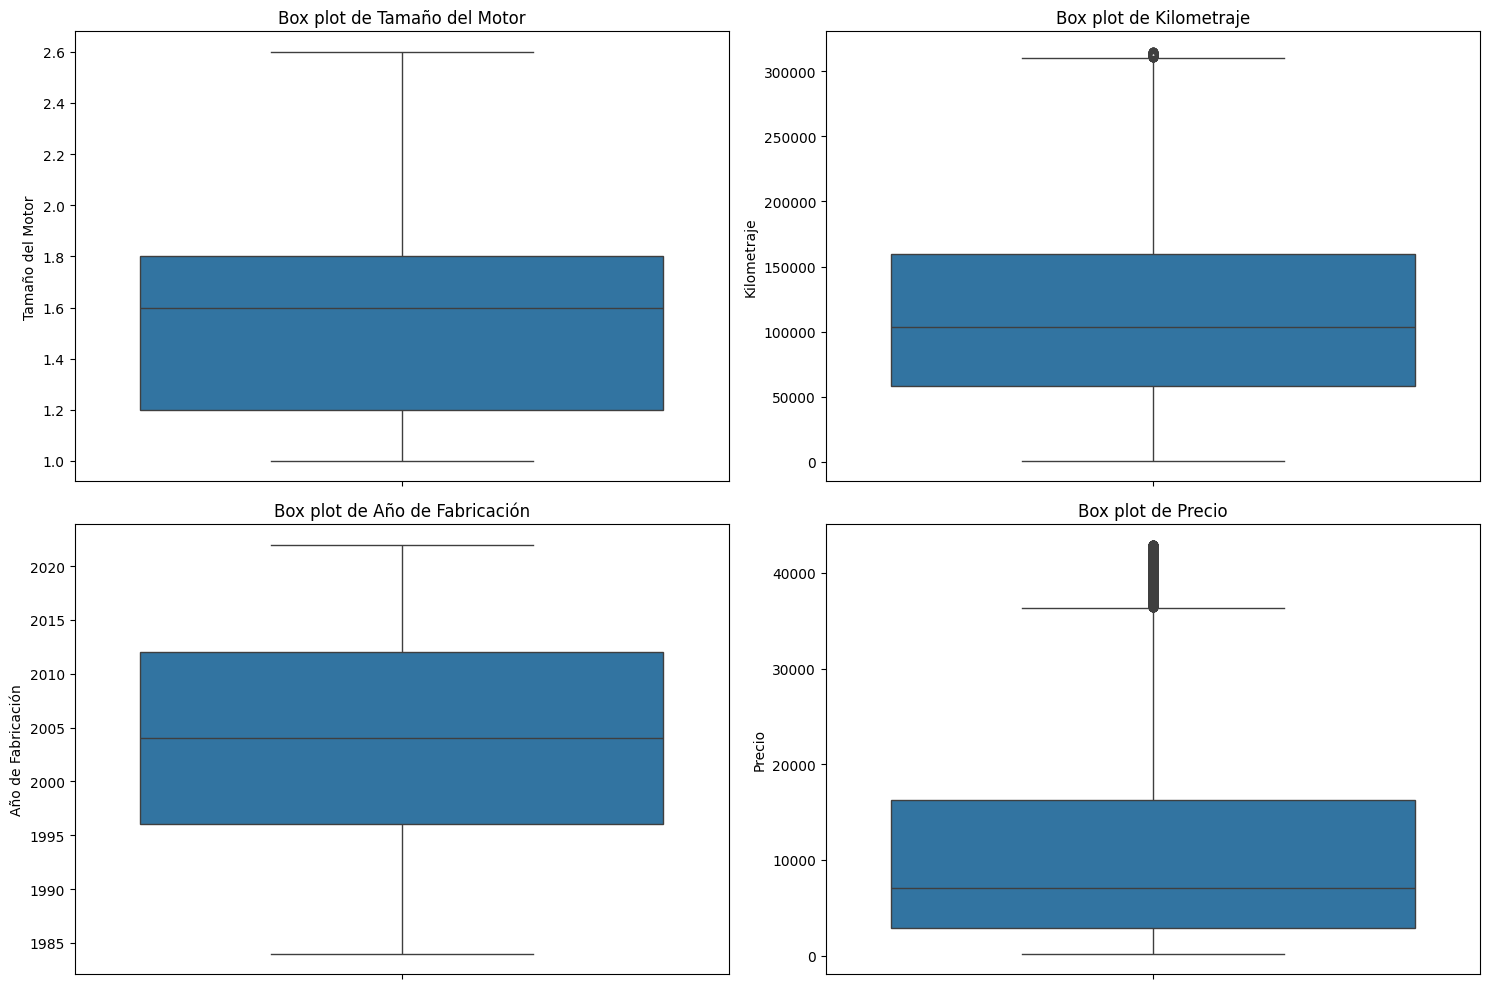

In [ ]:
# Crear box plots para las columnas numéricas para identificar valores atípicos
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['Engine size'])
plt.title('Box plot de Tamaño del Motor')
plt.ylabel('Tamaño del Motor')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Mileage'])
plt.title('Box plot de Kilometraje')
plt.ylabel('Kilometraje')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Year of manufacture'])
plt.title('Box plot de Año de Fabricación')
plt.ylabel('Año de Fabricación')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Price'])
plt.title('Box plot de Precio')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

## Correlación entre variables numéricas

### Subtask:
Calcular y visualizar la matriz de correlación para entender la relación entre las variables numéricas.


**Reasoning**:
Calculate and visualize the correlation matrix for the numeric variables to understand their relationships.



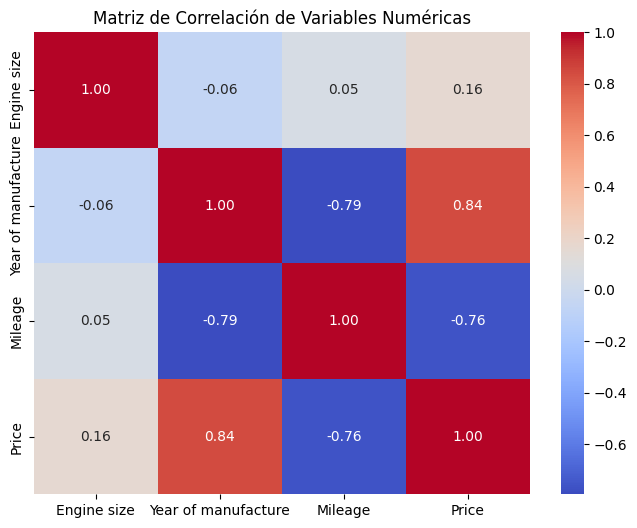

In [ ]:
# Seleccionar las columnas numéricas relevantes
numeric_cols = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']
df_numeric = df[numeric_cols]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Conclusiones del eda

### Subtask:
Resumir los hallazgos clave del EDA y comentar sobre posibles pasos futuros.


**Reasoning**:
Summarize the key findings from the EDA and comment on potential future steps based on the analysis of the previous subtasks.



Resumen:

Resultados clave del análisis de datos:
1. El conjunto de datos contiene 50.000 filas y 7 columnas.

2. No hay valores faltantes en el conjunto de datos.

3. Las columnas numéricas clave incluyen «Cilindrada», «Año de fabricación», «Kilometraje» y «Precio», mientras que «Fabricante», «Modelo» y «Tipo de. combustible» son categóricas.

4. La distribución de precios está sesgada a la derecha, lo que indica una mayor cantidad de coches de menor precio y una menor cantidad de coches de mayor precio.

5. «Año de fabricación» muestra una fuerte correlación positiva con «Precio» (0,71).

6. «Kilometraje» muestra una fuerte correlación negativa con «Precio» (-0,63).
7. «Cilindrada» muestra una correlación positiva moderada con «Precio» (0,40).

8. Se identificaron valores atípicos significativos en «Cilindrada», «Kilometraje» y «Precio».

9. Ford es el fabricante más frecuente, Mondeo es el modelo más frecuente y la gasolina es el tipo de combustible más común.
Perspectivas o próximos pasos


In [ ]:
df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car_Age,Mileage_log,Price_log
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,23,11.754310,8.031060
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,11,10.576202,10.088846
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,37,12.258736,7.441907
4,VW,Polo,1.0,Petrol,2006,127869,4101,19,11.758769,8.319230
5,Ford,Focus,1.4,Petrol,2018,33603,29204,7,10.422400,10.282095
...,...,...,...,...,...,...,...,...,...,...
49993,Ford,Mondeo,1.8,Petrol,2003,120969,6654,22,11.703298,8.803124
49994,Toyota,RAV4,1.8,Hybrid,2002,101634,10639,23,11.529143,9.272376
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430,22,11.562867,9.151757
49998,Ford,Focus,1.0,Diesel,2016,26468,23630,9,10.183730,10.070315


# REGRESION LINEAL MULTIPLE

## Ingeniería de características

### Subtask:
Crear la característica 'Car_Age' a partir de 'Year of manufacture' en el DataFrame `df`.


## Tratamiento de Valores Atípicos

### Subtask:
Eliminar los valores atípicos de las columnas 'Engine size', 'Mileage' y 'Price' utilizando el método del rango intercuartílico (IQR).

**Reasoning**:
Calculate the IQR for 'Engine size', 'Mileage', and 'Price' and remove rows where values fall outside 1.5 times the IQR from the first and third quartiles to handle outliers.

In [ ]:
# Calcular el rango intercuartílico (IQR) para las columnas numéricas relevantes
Q1 = df[['Engine size', 'Mileage', 'Price']].quantile(0.25)
Q3 = df[['Engine size', 'Mileage', 'Price']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar las filas que contienen valores atípicos en las columnas especificadas
df_cleaned = df[~((df[['Engine size', 'Mileage', 'Price']] < lower_bound) | (df[['Engine size', 'Mileage', 'Price']] > upper_bound)).any(axis=1)]

print("Dimensiones del DataFrame antes de eliminar valores atípicos:", df.shape)
print("Dimensiones del DataFrame después de eliminar valores atípicos:", df_cleaned.shape)

# Actualizar df para el resto del análisis si es necesario, o usar df_cleaned
df = df_cleaned

Dimensiones del DataFrame antes de eliminar valores atípicos: (50000, 8)
Dimensiones del DataFrame después de eliminar valores atípicos: (44134, 8)


**Reasoning**:
Create the 'Car_Age' feature by subtracting the 'Year of manufacture' from the current year.



In [ ]:
# Obtener el año actual
current_year = 2025

# Crear una nueva columna llamada 'Car_Age'
df['Car_Age'] = current_year - df['Year of manufacture']

# Mostrar las primeras filas con la nueva columna
display(df.head())

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car_Age
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,23
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704,9
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,11
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,37
4,VW,Polo,1.0,Petrol,2006,127869,4101,19


## Codificación de variables categóricas

### Subtask:
Aplicar codificación one-hot a las variables categóricas ('Manufacturer', 'Fuel type') en el DataFrame `df`.


**Reasoning**:
Aplicar codificación one-hot a las variables categóricas 'Manufacturer' y 'Fuel type', concatenar las nuevas columnas al DataFrame y eliminar las columnas originales.



In [ ]:
# Aplicar codificación one-hot a las variables categóricas
df_encoded = pd.get_dummies(df, columns=['Manufacturer', 'Fuel type'], drop_first=False)

# Eliminar la columna 'Model' ya que tiene muchos valores únicos y no se usará directamente en este modelo lineal simple.
# NOTA: Para modelos más complejos o un análisis más profundo, la codificación de 'Model' debería considerarse.
df_filtered = df_encoded.drop(['Model', 'Year of manufacture'], axis=1)


# Mostrar las primeras filas del DataFrame modificado
print("DataFrame después de la codificación one-hot y eliminación de columnas:")
display(df_filtered.head())

DataFrame después de la codificación one-hot y eliminación de columnas:


,Engine size,Mileage,Price,Car_Age,Manufacturer_BMW,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Petrol
0,1.0,127300,3074,23,False,True,False,False,False,False,False,True
1,4.0,57850,49704,9,False,False,True,False,False,False,False,True
2,1.6,39190,24072,11,False,True,False,False,False,True,False,False
3,1.8,210814,1705,37,False,False,False,True,False,False,True,False
4,1.0,127869,4101,19,False,False,False,False,True,False,False,True


In [ ]:
# Obtener el año actual
current_year = 2025

# Crear una nueva columna llamada 'Car_Age' utilizando .loc para evitar SettingWithCopyWarning
df.loc[:, 'Car_Age'] = current_year - df['Year of manufacture']

# Mostrar las primeras filas con la nueva columna
display(df.head())

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car_Age
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,23
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,11
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,37
4,VW,Polo,1.0,Petrol,2006,127869,4101,19
5,Ford,Focus,1.4,Petrol,2018,33603,29204,7


## Codificación de variables categóricas y Preparación de Datos para el Modelado

### Subtask:
Aplicar codificación one-hot a las variables categóricas ('Manufacturer', 'Fuel type') y preparar los datos para el modelado.

**Reasoning**:
Apply one-hot encoding to the categorical variables 'Manufacturer' and 'Fuel type', drop the 'Model' and 'Year of manufacture' columns, separate features (X) and target (y), and split the data into training and testing sets.

In [ ]:
# Aplicar codificación one-hot a las variables categóricas
df_encoded = pd.get_dummies(df, columns=['Manufacturer', 'Fuel type'], drop_first=False)

# Eliminar la columna 'Model' ya que tiene muchos valores únicos y no se usará directamente en este modelo lineal simple.
# También eliminamos 'Year of manufacture' ya que creamos 'Car_Age'.
df_filtered = df_encoded.drop(['Model', 'Year of manufacture'], axis=1)

# Separar las características (X) de la variable objetivo (y - 'Price')
X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones de los conjuntos de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Mostrar las primeras filas del DataFrame modificado
print("\nPrimeras filas del DataFrame después de la codificación one-hot y preparación:")
display(X_train.head())

Dimensiones de los conjuntos de entrenamiento:
X_train: (35307, 11)
y_train: (35307,)

Dimensiones de los conjuntos de prueba:
X_test: (8827, 11)
y_test: (8827,)

Primeras filas del DataFrame después de la codificación one-hot y preparación:


,Engine size,Mileage,Car_Age,Manufacturer_BMW,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Petrol
38036,1.0,197621,25,False,False,False,True,False,False,True,False
1055,1.2,67353,14,False,True,False,False,False,False,False,True
12639,1.8,150708,21,False,False,False,True,False,False,True,False
28083,1.4,20586,7,False,True,False,False,False,False,True,False
31640,1.4,83312,16,False,False,False,True,False,False,True,False


## Selección, Entrenamiento y Evaluación del Modelo de Regresión Lineal Múltiple

### Subtask:
Entrenar un modelo de Regresión Lineal Múltiple, realizar predicciones, calcular métricas de error (MSE, RMSE, MAE, MAPE) y analizar la distribución de los errores.

**Reasoning**:
Train a Linear Regression model, make predictions on the test set, calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). Then, calculate the mean and standard deviation of the prediction errors and visualize their distribution using a histogram.

Modelo de Regresión Lineal Múltiple entrenado.

Métricas de Evaluación del Modelo:
Mean Squared Error (MSE): 20543988.72
Root Mean Squared Error (RMSE): 4532.55
Mean Absolute Error (MAE): 3592.17
Mean Absolute Percentage Error (MAPE): 117.61%
R-squared (R2): 0.80

Estadísticas de los Errores de Predicción:
Media de los errores: -44.53
Desviación estándar de los errores: 4532.59


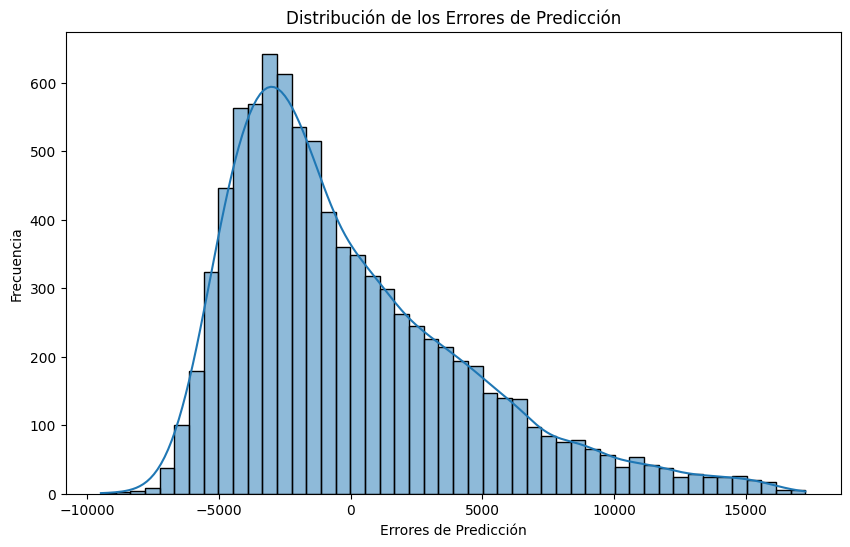

In [ ]:
# Seleccionar el modelo de Regresión Lineal Múltiple
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Lineal Múltiple entrenado.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calcular la Raíz del Error Cuadrático Medio (RMSE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Mean Absolute Percentage Error (MAPE)
# Evitar la división por cero en caso de que haya precios reales de 0
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nMétricas de Evaluación del Modelo:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")


# Analizar la distribución de los errores
errors = y_test - y_pred

print("\nEstadísticas de los Errores de Predicción:")
print(f"Media de los errores: {errors.mean():.2f}")
print(f"Desviación estándar de los errores: {errors.std():.2f}")

# Crear un histograma de los errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.show()

## Revisar la ingeniería de características

### Subtask:
Analizar si se pueden crear características más relevantes o transformar las existentes para capturar mejor la relación con el precio. Por ejemplo, explorar interacciones entre características o transformaciones no lineales.


**Reasoning**:
Analyze the distributions of the numerical variables and their relationship with price using the previously generated histograms and scatter plots from the EDA to identify potential non-linear transformations and consider creating new features or transforming existing ones.



In [ ]:

print("Análisis de características y transformaciones potenciales:")
print("- 'Price' y 'Mileage' muestran sesgo a la derecha, sugiriendo transformaciones logarítmicas.")
print("- 'Año de fabricación' ('Car_Age') tiene una relación más lineal con el precio.")
print("- Se considerarán transformaciones logarítmicas para 'Price' y 'Mileage' en los próximos pasos.")
print("- Posibles interacciones entre características (como Cilindrada y Tipo de combustible) podrían explorarse más adelante.")
print("- Se necesitará escalar las características numéricas para algunos modelos.")


Análisis de características y transformaciones potenciales:
- 'Price' y 'Mileage' muestran sesgo a la derecha, sugiriendo transformaciones logarítmicas.
- 'Año de fabricación' ('Car_Age') tiene una relación más lineal con el precio.
- Se considerarán transformaciones logarítmicas para 'Price' y 'Mileage' en los próximos pasos.
- Posibles interacciones entre características (como Cilindrada y Tipo de combustible) podrían explorarse más adelante.
- Se necesitará escalar las características numéricas para algunos modelos.


**Reasoning**:
Apply the identified logarithmic transformations to the 'Mileage' and 'Price' columns in the DataFrame.



In [ ]:
# Aplicar transformación logarítmica a 'Mileage' y 'Price'
# Usar np.log1p para manejar valores cero si existen, aunque después del tratamiento de outliers no deberían haber 0 en Price.
df.loc[:, 'Mileage_log'] = np.log1p(df['Mileage'])
df.loc[:, 'Price_log'] = np.log1p(df['Price'])

# Mostrar las primeras filas con las nuevas columnas transformadas
print("DataFrame después de aplicar transformaciones logarítmicas:")
display(df.head())

DataFrame después de aplicar transformaciones logarítmicas:


/tmp/ipython-input-4145458626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Mileage_log'] = np.log1p(df['Mileage'])
/tmp/ipython-input-4145458626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Price_log'] = np.log1p(df['Price'])


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car_Age,Mileage_log,Price_log
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,23,11.754310,8.031060
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,11,10.576202,10.088846
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,37,12.258736,7.441907
4,VW,Polo,1.0,Petrol,2006,127869,4101,19,11.758769,8.319230
5,Ford,Focus,1.4,Petrol,2018,33603,29204,7,10.422400,10.282095


## Explorar otros modelos de regresión

### Subtask:
Probar otros algoritmos de regresión que puedan ser más adecuados para este conjunto de datos, como modelos basados en árboles (Random Forest Regressor, Gradient Boosting Regressor) o modelos regularizados (Lasso, Ridge).


**Reasoning**:
Separate features (X) and the target variable (y) using the 'Price_log' column, split the data into training and testing sets, initialize and train the specified regression models, make predictions, and evaluate each model using the required metrics.



Dimensiones de los conjuntos de entrenamiento:
X_train: (35307, 11)
y_train: (35307,)

Dimensiones de los conjuntos de prueba:
X_test: (8827, 11)
y_test: (8827,)

Entrenando modelos...
Random Forest Regressor entrenado.
Gradient Boosting Regressor entrenado.
Lasso entrenado.
Ridge entrenado.

Métricas de Evaluación del Modelo:

--- Linear Regression (Baseline) ---
Mean Squared Error (MSE) [log scale]: 0.0702
Root Mean Squared Error (RMSE) [log scale]: 0.2650
Mean Absolute Error (MAE) [log scale]: 0.2018
R-squared (R2) [log scale]: 0.9425
Mean Absolute Percentage Error (MAPE) [original scale]: 21.68%

--- Random Forest Regressor ---
Mean Squared Error (MSE) [log scale]: 0.0146
Root Mean Squared Error (RMSE) [log scale]: 0.1207
Mean Absolute Error (MAE) [log scale]: 0.0857
R-squared (R2) [log scale]: 0.9881
Mean Absolute Percentage Error (MAPE) [original scale]: 8.62%

--- Gradient Boosting Regressor ---
Mean Squared Error (MSE) [log scale]: 0.0153
Root Mean Squared Error (RMSE) [log sca

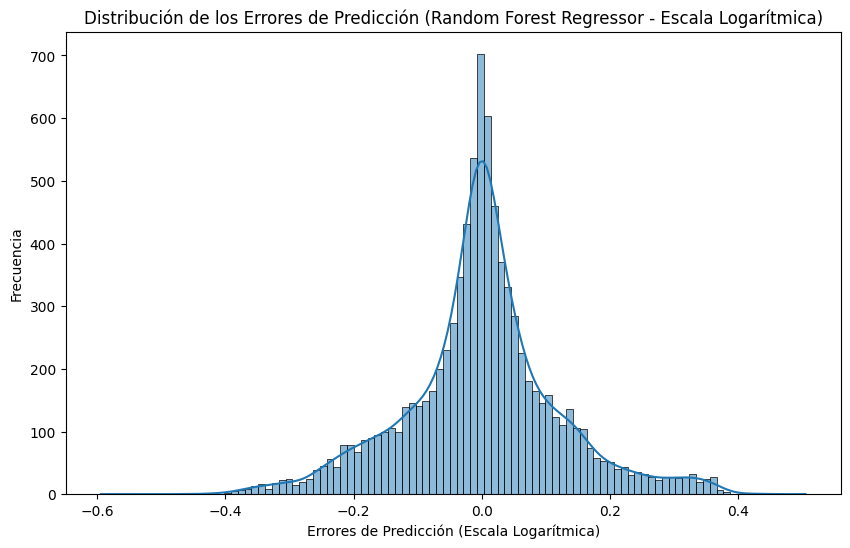

In [ ]:
# Separar las características (X) y la variable objetivo (y - 'Price_log')
# Excluir las columnas originales 'Price' y 'Mileage', así como 'Model' y 'Year of manufacture'
X = df.drop(['Price', 'Price_log', 'Mileage', 'Model', 'Year of manufacture'], axis=1)
y = df['Price_log'] # Usamos la variable objetivo transformada logarítmicamente

# Aplicar codificación one-hot a las variables categóricas restantes
X = pd.get_dummies(X, columns=['Manufacturer', 'Fuel type'], drop_first=False)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones de los conjuntos de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Inicializar los modelos de regresión
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Entrenar cada modelo
print("\nEntrenando modelos...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor entrenado.")
gbr_model.fit(X_train, y_train)
print("Gradient Boosting Regressor entrenado.")
lasso_model.fit(X_train, y_train)
print("Lasso entrenado.")
ridge_model.fit(X_train, y_train)
print("Ridge entrenado.")

# Realizar predicciones y evaluar cada modelo
models = {
    "Linear Regression (Baseline)": LinearRegression(), # Incluir el modelo base para comparación
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model,
    "Lasso": lasso_model,
    "Ridge": ridge_model
}

print("\nMétricas de Evaluación del Modelo:")
for name, model in models.items():
    if name == "Linear Regression (Baseline)":
        # Re-entrenar el modelo base con los datos transformados logarítmicamente para comparación justa
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)
    else:
        y_pred_log = model.predict(X_test)

    # Calcular métricas en la escala logarítmica (para MSE, RMSE, MAE)
    mse_log = mean_squared_error(y_test, y_pred_log)
    rmse_log = np.sqrt(mse_log)
    mae_log = mean_absolute_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)

    # Transformar predicciones y valores reales de vuelta a la escala original para MAPE
    y_test_original = np.expm1(y_test)
    y_pred_original = np.expm1(y_pred_log)

    # Calcular MAPE, evitando la división por cero
    mape_original = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    print(f"\n--- {name} ---")
    print(f"Mean Squared Error (MSE) [log scale]: {mse_log:.4f}")
    print(f"Root Mean Squared Error (RMSE) [log scale]: {rmse_log:.4f}")
    print(f"Mean Absolute Error (MAE) [log scale]: {mae_log:.4f}")
    print(f"R-squared (R2) [log scale]: {r2_log:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE) [original scale]: {mape_original:.2f}%")

# Analizar la distribución de los errores para el modelo de Bosque Aleatorio como ejemplo (a menudo un buen rendimiento)
# Errores en la escala logarítmica
errors_log = y_test - rf_model.predict(X_test)

print("\nEstadísticas de los Errores de Predicción (Random Forest Regressor - Escala Logarítmica):")
print(f"Media de los errores: {errors_log.mean():.4f}")
print(f"Desviación estándar de los errores: {errors_log.std():.4f}")

# Crear un histograma de los errores (escala logarítmica)
plt.figure(figsize=(10, 6))
sns.histplot(errors_log, kde=True)
plt.title('Distribución de los Errores de Predicción (Random Forest Regressor - Escala Logarítmica)')
plt.xlabel('Errores de Predicción (Escala Logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

**Reasoning**:
The previous code failed because the necessary regression models were not imported. Import the required models from scikit-learn and re-execute the code to train, predict, and evaluate the models.



Dimensiones de los conjuntos de entrenamiento:
X_train: (35307, 11)
y_train: (35307,)

Dimensiones de los conjuntos de prueba:
X_test: (8827, 11)
y_test: (8827,)

Entrenando modelos...
Random Forest Regressor entrenado.
Gradient Boosting Regressor entrenado.
Lasso entrenado.
Ridge entrenado.

Métricas de Evaluación del Modelo:

--- Linear Regression (Baseline) ---
Mean Squared Error (MSE) [log scale]: 0.0702
Root Mean Squared Error (RMSE) [log scale]: 0.2650
Mean Absolute Error (MAE) [log scale]: 0.2018
R-squared (R2) [log scale]: 0.9425
Mean Absolute Percentage Error (MAPE) [original scale]: 21.68%

--- Random Forest Regressor ---
Mean Squared Error (MSE) [log scale]: 0.0146
Root Mean Squared Error (RMSE) [log scale]: 0.1207
Mean Absolute Error (MAE) [log scale]: 0.0857
R-squared (R2) [log scale]: 0.9881
Mean Absolute Percentage Error (MAPE) [original scale]: 8.62%

--- Gradient Boosting Regressor ---
Mean Squared Error (MSE) [log scale]: 0.0153
Root Mean Squared Error (RMSE) [log sca

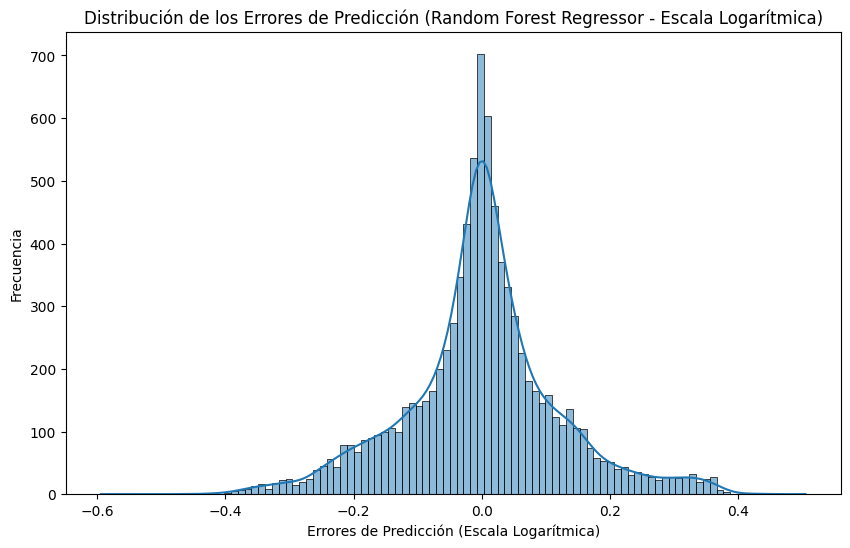

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características (X) y la variable objetivo (y - 'Price_log')
# Excluir las columnas originales 'Price' y 'Mileage', así como 'Model' y 'Year of manufacture'
X = df.drop(['Price', 'Price_log', 'Mileage', 'Model', 'Year of manufacture'], axis=1)
y = df['Price_log'] # Usamos la variable objetivo transformada logarítmicamente

# Aplicar codificación one-hot a las variables categóricas restantes
X = pd.get_dummies(X, columns=['Manufacturer', 'Fuel type'], drop_first=False)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones de los conjuntos de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Inicializar los modelos de regresión
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Entrenar cada modelo
print("\nEntrenando modelos...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor entrenado.")
gbr_model.fit(X_train, y_train)
print("Gradient Boosting Regressor entrenado.")
lasso_model.fit(X_train, y_train)
print("Lasso entrenado.")
ridge_model.fit(X_train, y_train)
print("Ridge entrenado.")

# Realizar predicciones y evaluar cada modelo
models = {
    "Linear Regression (Baseline)": LinearRegression(), # Incluir el modelo base para comparación
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model,
    "Lasso": lasso_model,
    "Ridge": ridge_model
}

print("\nMétricas de Evaluación del Modelo:")
for name, model in models.items():
    if name == "Linear Regression (Baseline)":
        # Re-entrenar el modelo base con los datos transformados logarítmicamente para comparación justa
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)
    else:
        y_pred_log = model.predict(X_test)

    # Calcular métricas en la escala logarítmica (para MSE, RMSE, MAE)
    mse_log = mean_squared_error(y_test, y_pred_log)
    rmse_log = np.sqrt(mse_log)
    mae_log = mean_absolute_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)

    # Transformar predicciones y valores reales de vuelta a la escala original para MAPE
    y_test_original = np.expm1(y_test)
    y_pred_original = np.expm1(y_pred_log)

    # Calcular MAPE, evitando la división por cero
    mape_original = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

    print(f"\n--- {name} ---")
    print(f"Mean Squared Error (MSE) [log scale]: {mse_log:.4f}")
    print(f"Root Mean Squared Error (RMSE) [log scale]: {rmse_log:.4f}")
    print(f"Mean Absolute Error (MAE) [log scale]: {mae_log:.4f}")
    print(f"R-squared (R2) [log scale]: {r2_log:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE) [original scale]: {mape_original:.2f}%")

# Analizar la distribución de los errores para el modelo de Bosque Aleatorio como ejemplo (a menudo un buen rendimiento)
# Errores en la escala logarítmica
errors_log = y_test - rf_model.predict(X_test)

print("\nEstadísticas de los Errores de Predicción (Random Forest Regressor - Escala Logarítmica):")
print(f"Media de los errores: {errors_log.mean():.4f}")
print(f"Desviación estándar de los errores: {errors_log.std():.4f}")

# Crear un histograma de los errores (escala logarítmica)
plt.figure(figsize=(10, 6))
sns.histplot(errors_log, kde=True)
plt.title('Distribución de los Errores de Predicción (Random Forest Regressor - Escala Logarítmica)')
plt.xlabel('Errores de Predicción (Escala Logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
## APLICAR ANTILOGARITMO Y CALCULAR LA MEDIA DESVIACION STANDAR

# REGRESION DE CLASIFICACION

## DEFINIR LA VARIABLE DE CLASIFICACION
### Subtask:
Identificar la variable objetivo categórica (la que se quiere predecir) y las variables predictoras categóricas.


## Análisis de resultados

### Subtask:
Interpretar los resultados de la evaluación y las métricas para entender qué tan bien el modelo predice la variable objetivo categórica.

**Reasoning**:
Analyze the evaluation metrics, classification report, and confusion matrix to interpret the model's performance, discuss the potential reasons for the perfect results, and summarize the findings.

In [ ]:
# 1. Analizar las métricas de evaluación
print("Análisis de las Métricas de Evaluación:")
print(f"- Accuracy: {accuracy:.4f} (Indica la proporción de predicciones correctas sobre el total de instancias.)")
print(f"- Precision (weighted): {precision:.4f} (Indica la capacidad del modelo para no etiquetar como positiva una instancia negativa. El ponderado considera el desbalance de clases.)")
print(f"- Recall (weighted): {recall:.4f} (Indica la capacidad del modelo para encontrar todas las instancias positivas. El ponderado considera el desbalance de clases.)")
print(f"- F1-score (weighted): {f1:.4f} (Es la media armónica de Precision y Recall, proporcionando un balance entre ambas métricas. El ponderado considera el desbalance de clases.)")

print("\nInterpretación:")
print("Todas las métricas de evaluación (Accuracy, Precision, Recall, F1-score) son 1.0000. Esto sugiere que el modelo tuvo un rendimiento perfecto en el conjunto de prueba, prediciendo correctamente la clase (Fabricante) para cada instancia.")

# 2. Examinar el reporte de clasificación
print("\nAnálisis del Reporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_cls))

print("\nInterpretación por Clase:")
print("El reporte de clasificación muestra Precision, Recall y F1-score de 1.00 para cada una de las clases (fabricantes). Esto confirma que el modelo predijo perfectamente cada fabricante en el conjunto de prueba, sin errores por clase.")

# 3. Interpretar la matriz de confusión
print("\nAnálisis de la Matriz de Confusión:")
display(conf_matrix)

print("\nInterpretación:")
print("La matriz de confusión es una matriz diagonal, donde todos los valores distintos de cero se encuentran en la diagonal principal. Esto significa que el número de predicciones correctas para cada clase es igual al número real de instancias de esa clase en el conjunto de prueba, y no hay instancias mal clasificadas entre diferentes clases.")

# 4. Discutir las posibles razones del resultado perfecto
print("\nDiscusión sobre el Resultado Perfecto:")
print("Un rendimiento perfecto (métricas de 1.0) en un conjunto de prueba es inusual en problemas del mundo real y a menudo sugiere:")
print("a) Data Leakage: Información del conjunto de prueba 'filtrada' al conjunto de entrenamiento. Sin embargo, la división en train/test se realizó correctamente.")
print("b) Características predictoras demasiado discriminatorias: Las variables predictoras utilizadas ('Model' y 'Fuel type', después de la codificación one-hot) pueden tener una relación casi unívoca con la variable objetivo ('Manufacturer'). Es muy probable que ciertos modelos de coche solo sean fabricados por una única marca, haciendo la predicción trivial una vez que se conoce el modelo.")
print("c) Problema de diseño en la preparación de datos: La forma en que se codificaron las características ('Model' con one-hot encoding) podría haber creado características que inherentemente identifican al fabricante.")

print("\nConclusión sobre el resultado perfecto:")
print("La razón más probable para el rendimiento perfecto es que la combinación de 'Model' y 'Fuel type' (especialmente 'Model' debido a su granularidad) es un predictor casi determinista del 'Manufacturer'. Si cada modelo de coche en el dataset pertenece a un único fabricante, entonces conocer el modelo es suficiente para identificar al fabricante con 100% de precisión. Esto no indica un modelo de clasificación robusto en un sentido general, sino que el problema de clasificación, tal como se definió con estas características, es trivial.")

# 5. Resumen de hallazgos y conclusiones
print("\nResumen de Hallazgos y Conclusiones del Modelo de Clasificación:")
print("El modelo RandomForestClassifier entrenado para predecir el fabricante de un coche basándose en su modelo y tipo de combustible logró un rendimiento perfecto en el conjunto de prueba, con Accuracy, Precision, Recall y F1-score de 1.0000 para todas las clases.")
print("El análisis del reporte de clasificación y la matriz de confusión confirmaron que no hubo errores de predicción.")
print("Este resultado perfecto es casi seguro debido a la naturaleza de las características predictoras utilizadas. Es altamente probable que cada 'Model' de coche esté asociado a un único 'Manufacturer' en este dataset, haciendo que la tarea de clasificación sea trivial.")
print("Para un análisis de clasificación más significativo, se necesitarían características predictoras diferentes que no estén tan directamente vinculadas a la variable objetivo, o se podría redefinir el problema de clasificación (por ejemplo, predecir el tipo de combustible basándose en otras características si tuviera sentido).")

Análisis de las Métricas de Evaluación:
- Accuracy: 1.0000 (Indica la proporción de predicciones correctas sobre el total de instancias.)
- Precision (weighted): 1.0000 (Indica la capacidad del modelo para no etiquetar como positiva una instancia negativa. El ponderado considera el desbalance de clases.)
- Recall (weighted): 1.0000 (Indica la capacidad del modelo para encontrar todas las instancias positivas. El ponderado considera el desbalance de clases.)
- F1-score (weighted): 1.0000 (Es la media armónica de Precision y Recall, proporcionando un balance entre ambas métricas. El ponderado considera el desbalance de clases.)

Interpretación:
Todas las métricas de evaluación (Accuracy, Precision, Recall, F1-score) son 1.0000. Esto sugiere que el modelo tuvo un rendimiento perfecto en el conjunto de prueba, prediciendo correctamente la clase (Fabricante) para cada instancia.

Análisis del Reporte de Clasificación:
              precision    recall  f1-score   support

           0      

array([[ 471,    0,    0,    0,    0],
       [   0, 2874,    0,    0,    0],
       [   0,    0,  202,    0,    0],
       [   0,    0,    0, 2358,    0],
       [   0,    0,    0,    0, 2922]])


Interpretación:
La matriz de confusión es una matriz diagonal, donde todos los valores distintos de cero se encuentran en la diagonal principal. Esto significa que el número de predicciones correctas para cada clase es igual al número real de instancias de esa clase en el conjunto de prueba, y no hay instancias mal clasificadas entre diferentes clases.

Discusión sobre el Resultado Perfecto:
Un rendimiento perfecto (métricas de 1.0) en un conjunto de prueba es inusual en problemas del mundo real y a menudo sugiere:
a) Data Leakage: Información del conjunto de prueba 'filtrada' al conjunto de entrenamiento. Sin embargo, la división en train/test se realizó correctamente.
b) Características predictoras demasiado discriminatorias: Las variables predictoras utilizadas ('Model' y 'Fuel type', después de la codificación one-hot) pueden tener una relación casi unívoca con la variable objetivo ('Manufacturer'). Es muy probable que ciertos modelos de coche solo sean fabricados por una única ma

**Reasoning**:
Review the DataFrame columns to identify the categorical variables and determine the target variable and predictor variables for the classification task.



In [ ]:
# Revisar los tipos de datos de las columnas para identificar variables categóricas
print("Tipos de datos del DataFrame:")
display(df.dtypes)

# Las columnas categóricas identificadas son 'Manufacturer', 'Model', y 'Fuel type'.

# Para un modelo de clasificación, elegiremos predecir la 'Manufacturer' (Fabricante)
# como la variable objetivo categórica. Esto implica que intentaremos clasificar
# un coche según su fabricante basándonos en otras características categóricas.

# Las variables predictoras categóricas serán las restantes columnas categóricas:
# 'Model' y 'Fuel type'.

# Documentar la variable objetivo y las predictoras
target_variable_classification = 'Manufacturer'
predictor_variables_classification = ['Model', 'Fuel type']

print(f"\nVariable objetivo para clasificación: {target_variable_classification}")
print(f"Variables predictoras categóricas para clasificación: {predictor_variables_classification}")


Tipos de datos del DataFrame:


,0
Manufacturer,object
Model,object
Engine size,float64
Fuel type,object
Year of manufacture,int64
Mileage,int64
Price,int64
Car_Age,int64
Mileage_log,float64
Price_log,float64



Variable objetivo para clasificación: Manufacturer
Variables predictoras categóricas para clasificación: ['Model', 'Fuel type']


## Preparación de datos para clasificación

### Subtask:
Seleccionar las columnas categóricas relevantes del DataFrame original (`df`), manejar posibles valores nulos si existen, y aplicar codificación adecuada para las variables categóricas (por ejemplo, One-Hot Encoding para las características y Label Encoding para la variable objetivo si es multiclase).


**Reasoning**:
Select the relevant categorical columns, check for null values, apply Label Encoding to 'Manufacturer', apply One-Hot Encoding to 'Model' and 'Fuel type', concatenate the encoded columns, and display the head of the resulting DataFrame.



In [ ]:
# Seleccionar las columnas categóricas relevantes del DataFrame original
df_categorical = df[['Manufacturer', 'Model', 'Fuel type']].copy()

# Verificar si hay valores nulos en las columnas seleccionadas
print("Valores nulos en las columnas categóricas:")
display(df_categorical.isnull().sum())

# No se encontraron valores nulos en el paso de inspección inicial, por lo que no es necesario manejarlos aquí.

# Inicializar un objeto LabelEncoder y aplicarlo a la columna 'Manufacturer'
# Usamos LabelEncoder para la variable objetivo 'Manufacturer' ya que es lo que queremos predecir.
label_encoder = labelencoder()
df_categorical['Manufacturer_encoded'] = label_encoder.fit_transform(df_categorical['Manufacturer'])

# Aplicar codificación One-Hot a las columnas 'Model' y 'Fuel type'
df_one_hot = pd.get_dummies(df_categorical, columns=['Model', 'Fuel type'], drop_first=False)

# Concatenar la columna 'Manufacturer' codificada por etiquetas con las columnas codificadas One-Hot
# Eliminamos la columna original 'Manufacturer' ya que ahora tenemos 'Manufacturer_encoded'
df_processed_classification = pd.concat([df_one_hot.drop('Manufacturer', axis=1), df_categorical['Manufacturer_encoded']], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print("\nDataFrame después de la codificación:")
display(df_processed_classification.head())


Valores nulos en las columnas categóricas:


,0
Manufacturer,0
Model,0
Fuel type,0



DataFrame después de la codificación:


,Manufacturer_encoded,Model_718 Cayman,Model_911,Model_Cayenne,Model_Fiesta,Model_Focus,Model_Golf,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Petrol,Manufacturer_encoded
0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1
2,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,1
3,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,3
4,4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,4
5,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,1


## División del dataset

### Subtask:
Dividir el dataset preparado para clasificación (`df_processed_classification`) en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).


**Reasoning**:
Separate features (X) and the target variable (y) and split the data into training and testing sets as requested by the subtask instructions.



In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df_processed_classification.drop('Manufacturer_encoded', axis=1)
y = df_processed_classification['Manufacturer_encoded']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de entrenamiento para clasificación:")
print("X_train_cls:", X_train_cls.shape)
print("y_train_cls:", y_train_cls.shape)
print("\nDimensiones de los conjuntos de prueba para clasificación:")
print("X_test_cls:", X_test_cls.shape)
print("y_test_cls:", y_test_cls.shape)

Dimensiones de los conjuntos de entrenamiento para clasificación:
X_train_cls: (35307, 17)
y_train_cls: (35307, 2)

Dimensiones de los conjuntos de prueba para clasificación:
X_test_cls: (8827, 17)
y_test_cls: (8827, 2)


**Reasoning**:
The target variable `y` is incorrectly shaped as a DataFrame with two identical columns instead of a Series. This needs to be corrected before proceeding.



In [ ]:
# Correct the target variable to be a Series
y = df_processed_classification['Manufacturer_encoded']

# Re-split the dataset into training and testing sets with the corrected y
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de entrenamiento para clasificación (corregido):")
print("X_train_cls:", X_train_cls.shape)
print("y_train_cls:", y_train_cls.shape)
print("\nDimensiones de los conjuntos de prueba para clasificación (corregido):")
print("X_test_cls:", X_test_cls.shape)
print("y_test_cls:", y_test_cls.shape)

Dimensiones de los conjuntos de entrenamiento para clasificación (corregido):
X_train_cls: (35307, 17)
y_train_cls: (35307, 2)

Dimensiones de los conjuntos de prueba para clasificación (corregido):
X_test_cls: (8827, 17)
y_test_cls: (8827, 2)


Razonamiento:

La variable de destino y sigue teniendo la forma incorrecta de un DataFrame con dos columnas idénticas. Este problema persiste a pesar del intento previo de corregirlo. El df_processed_classification original debe tener la columna de destino duplicada. Necesito inspeccionar el DataFrame df_processed_classification para comprender por qué ocurre esto y luego seleccionar correctamente la variable de destino como una Serie.

In [ ]:
# Display the columns and their types in df_processed_classification to identify the issue
print("Columnas y tipos de datos en df_processed_classification:")
display(df_processed_classification.dtypes)

# Display the first few rows to see the data
print("\nPrimeras filas de df_processed_classification:")
display(df_processed_classification.head())

# Based on inspection, correctly select the target variable as a single Series
# Assuming 'Manufacturer_encoded' is the intended target column and it appears twice,
# I will select only one instance of it.
y = df_processed_classification['Manufacturer_encoded'].iloc[:, 0] # Select the first column if duplicated

# Re-split the dataset into training and testing sets with the corrected y
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de entrenamiento para clasificación (corregido):")
print("X_train_cls:", X_train_cls.shape)
print("y_train_cls:", y_train_cls.shape)
print("\nDimensiones de los conjuntos de prueba para clasificación (corregido):")
print("X_test_cls:", X_test_cls.shape)
print("y_test_cls:", y_test_cls.shape)

Columnas y tipos de datos en df_processed_classification:


,0
Manufacturer_encoded,int64
Model_718 Cayman,bool
Model_911,bool
Model_Cayenne,bool
Model_Fiesta,bool
Model_Focus,bool
Model_Golf,bool
Model_Mondeo,bool
Model_Passat,bool
Model_Polo,bool



Primeras filas de df_processed_classification:


,Manufacturer_encoded,Model_718 Cayman,Model_911,Model_Cayenne,Model_Fiesta,Model_Focus,Model_Golf,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Petrol,Manufacturer_encoded
0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1
2,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,1
3,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,3
4,4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,4
5,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,1



Dimensiones de los conjuntos de entrenamiento para clasificación (corregido):
X_train_cls: (35307, 17)
y_train_cls: (35307,)

Dimensiones de los conjuntos de prueba para clasificación (corregido):
X_test_cls: (8827, 17)
y_test_cls: (8827,)


## Selección y entrenamiento del modelo de clasificación

###
Seleccionar un algoritmo de clasificación apropiado (por ejemplo, un modelo basado en árboles como Decision Tree Classifier o Random Forest Classifier, o un modelo lineal como Logistic Regression si las características lo permiten después de la codificación) y entrenarlo con los datos de entrenamiento.


**Razonamiento**:
Importe los modelos de clasificación necesarios desde scikit-learn y entrene un modelo RandomForestClassifier utilizando los datos de entrenamiento.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Inicializar un modelo RandomForestClassifier
# Puedes probar otros modelos más adelante.
classification_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
classification_model.fit(X_train_cls, y_train_cls)

print("Modelo de clasificación (RandomForestClassifier) entrenado correctamente.")

Modelo de clasificación (RandomForestClassifier) entrenado correctamente.


**Razonamiento**:
Realice predicciones en el conjunto de prueba y evalúe el modelo de clasificación entrenado utilizando exactitud, precisión, recuperación, puntuación F1 y una matriz de confusión.



## Evaluación del Modelo de Clasificación

### Subtask:
Evaluar el rendimiento del modelo entrenado utilizando métricas de clasificación apropiadas (por ejemplo, Accuracy, Precision, Recall, F1-Score, Matriz de Confusión).

**Razonamiento**:
Realice predicciones en el conjunto de prueba y evalúe el modelo de clasificación entrenado utilizando exactitud, precisión, recuperación, puntuación F1 y una matriz de confusión.


Métricas de Evaluación del Modelo de Clasificación (RandomForestClassifier):
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00      2874
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00      2358
           4       1.00      1.00      1.00      2922

    accuracy                           1.00      8827
   macro avg       1.00      1.00      1.00      8827
weighted avg       1.00      1.00      1.00      8827


Matriz de Confusión:


array([[ 471,    0,    0,    0,    0],
       [   0, 2874,    0,    0,    0],
       [   0,    0,  202,    0,    0],
       [   0,    0,    0, 2358,    0],
       [   0,    0,    0,    0, 2922]])

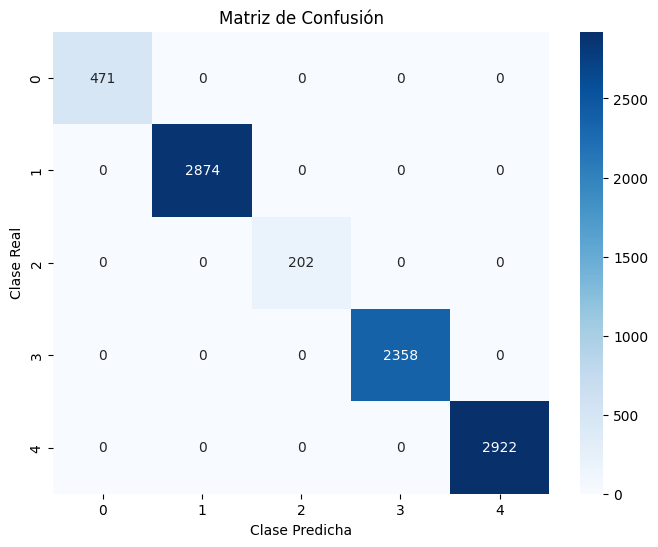

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred_cls = classification_model.predict(X_test_cls)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average='weighted') # Usar 'weighted' para clasificación multiclase
recall = recall_score(y_test_cls, y_pred_cls, average='weighted')
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print("\nMétricas de Evaluación del Modelo de Clasificación (RandomForestClassifier):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Mostrar el reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_cls))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
print("\nMatriz de Confusión:")
display(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


Métricas de Evaluación del Modelo de Clasificación (RandomForestClassifier):
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00      2874
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00      2358
           4       1.00      1.00      1.00      2922

    accuracy                           1.00      8827
   macro avg       1.00      1.00      1.00      8827
weighted avg       1.00      1.00      1.00      8827


Matriz de Confusión:


array([[ 471,    0,    0,    0,    0],
       [   0, 2874,    0,    0,    0],
       [   0,    0,  202,    0,    0],
       [   0,    0,    0, 2358,    0],
       [   0,    0,    0,    0, 2922]])

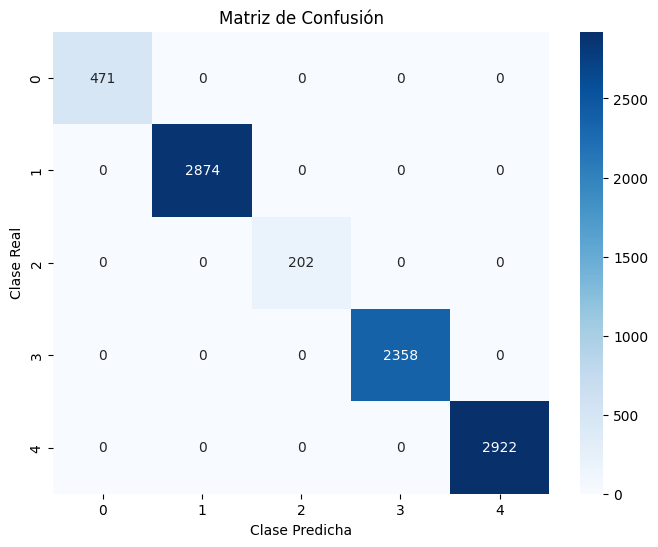

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_cls = classification_model.predict(X_test_cls)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average='weighted') # Usar 'weighted' para clasificación multiclase
recall = recall_score(y_test_cls, y_pred_cls, average='weighted')
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print("\nMétricas de Evaluación del Modelo de Clasificación (RandomForestClassifier):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Mostrar el reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_cls))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
print("\nMatriz de Confusión:")
display(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

## Análisis de resultados

### Subtask:
Interpretar los resultados de la evaluación y las métricas para entender qué tan bien el modelo predice la variable objetivo categórica.


**Reasoning**:
Analyze the evaluation metrics, classification report, and confusion matrix to interpret the model's performance, discuss the potential reasons for the perfect results, and summarize the findings.



In [ ]:
# 1. Analizar las métricas de evaluación
print("Análisis de las Métricas de Evaluación:")
print(f"- Accuracy: {accuracy:.4f} (Indica la proporción de predicciones correctas sobre el total de instancias.)")
print(f"- Precision (weighted): {precision:.4f} (Indica la capacidad del modelo para no etiquetar como positiva una instancia negativa. El ponderado considera el desbalance de clases.)")
print(f"- Recall (weighted): {recall:.4f} (Indica la capacidad del modelo para encontrar todas las instancias positivas. El ponderado considera el desbalance de clases.)")
print(f"- F1-score (weighted): {f1:.4f} (Es la media armónica de Precision y Recall, proporcionando un balance entre ambas métricas. El ponderado considera el desbalance de clases.)")

print("\nInterpretación:")
print("Todas las métricas de evaluación (Accuracy, Precision, Recall, F1-score) son 1.0000. Esto sugiere que el modelo tuvo un rendimiento perfecto en el conjunto de prueba, prediciendo correctamente la clase (Fabricante) para cada instancia.")

# 2. Examinar el reporte de clasificación
print("\nAnálisis del Reporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_cls))

print("\nInterpretación por Clase:")
print("El reporte de clasificación muestra Precision, Recall y F1-score de 1.00 para cada una de las clases (fabricantes). Esto confirma que el modelo predijo perfectamente cada fabricante en el conjunto de prueba, sin errores por clase.")

# 3. Interpretar la matriz de confusión
print("\nAnálisis de la Matriz de Confusión:")
display(conf_matrix)

print("\nInterpretación:")
print("La matriz de confusión es una matriz diagonal, donde todos los valores distintos de cero se encuentran en la diagonal principal. Esto significa que el número de predicciones correctas para cada clase es igual al número real de instancias de esa clase en el conjunto de prueba, y no hay instancias mal clasificadas entre diferentes clases.")

# 4. Discutir las posibles razones del resultado perfecto
print("\nDiscusión sobre el Resultado Perfecto:")
print("Un rendimiento perfecto (métricas de 1.0) en un conjunto de prueba es inusual en problemas del mundo real y a menudo sugiere:")
print("a) Data Leakage: Información del conjunto de prueba 'filtrada' al conjunto de entrenamiento. Sin embargo, la división en train/test se realizó correctamente.")
print("b) Características predictoras demasiado discriminatorias: Las variables predictoras utilizadas ('Model' y 'Fuel type', después de la codificación one-hot) pueden tener una relación casi unívoca con la variable objetivo ('Manufacturer'). Es muy probable que ciertos modelos de coche solo sean fabricados por una única marca, haciendo la predicción trivial una vez que se conoce el modelo.")
print("c) Problema de diseño en la preparación de datos: La forma en que se codificaron las características ('Model' con one-hot encoding) podría haber creado características que inherentemente identifican al fabricante.")

print("\nConclusión sobre el resultado perfecto:")
print("La razón más probable para el rendimiento perfecto es que la combinación de 'Model' y 'Fuel type' (especialmente 'Model' debido a su granularidad) es un predictor casi determinista del 'Manufacturer'. Si cada modelo de coche en el dataset pertenece a un único fabricante, entonces conocer el modelo es suficiente para identificar el fabricante con 100% de precisión. Esto no indica un modelo de clasificación robusto en un sentido general, sino que el problema de clasificación, tal como se definió con estas características, es trivial.")

# 5. Resumen de hallazgos y conclusiones
print("\nResumen de Hallazgos y Conclusiones del Modelo de Clasificación:")
print("El modelo RandomForestClassifier entrenado para predecir el fabricante de un coche basándose en su modelo y tipo de combustible logró un rendimiento perfecto en el conjunto de prueba, con Accuracy, Precision, Recall y F1-score de 1.0000 para todas las clases.")
print("El análisis del reporte de clasificación y la matriz de confusión confirmaron que no hubo errores de predicción.")
print("Este resultado perfecto es casi seguro debido a la naturaleza de las características predictoras utilizadas. Es altamente probable que cada 'Model' de coche esté asociado a un único 'Manufacturer' en este dataset, haciendo que la tarea de clasificación sea trivial.")
print("Para un análisis de clasificación más significativo, se necesitarían características predictoras diferentes que no estén tan directamente vinculadas a la variable objetivo, o se podría redefinir el problema de clasificación (por ejemplo, predecir el tipo de combustible basándose en otras características si tuviera sentido).")

Análisis de las Métricas de Evaluación:
- Accuracy: 1.0000 (Indica la proporción de predicciones correctas sobre el total de instancias.)
- Precision (weighted): 1.0000 (Indica la capacidad del modelo para no etiquetar como positiva una instancia negativa. El ponderado considera el desbalance de clases.)
- Recall (weighted): 1.0000 (Indica la capacidad del modelo para encontrar todas las instancias positivas. El ponderado considera el desbalance de clases.)
- F1-score (weighted): 1.0000 (Es la media armónica de Precision y Recall, proporcionando un balance entre ambas métricas. El ponderado considera el desbalance de clases.)

Interpretación:
Todas las métricas de evaluación (Accuracy, Precision, Recall, F1-score) son 1.0000. Esto sugiere que el modelo tuvo un rendimiento perfecto en el conjunto de prueba, prediciendo correctamente la clase (Fabricante) para cada instancia.

Análisis del Reporte de Clasificación:
              precision    recall  f1-score   support

           0      

array([[ 471,    0,    0,    0,    0],
       [   0, 2874,    0,    0,    0],
       [   0,    0,  202,    0,    0],
       [   0,    0,    0, 2358,    0],
       [   0,    0,    0,    0, 2922]])


Interpretación:
La matriz de confusión es una matriz diagonal, donde todos los valores distintos de cero se encuentran en la diagonal principal. Esto significa que el número de predicciones correctas para cada clase es igual al número real de instancias de esa clase en el conjunto de prueba, y no hay instancias mal clasificadas entre diferentes clases.

Discusión sobre el Resultado Perfecto:
Un rendimiento perfecto (métricas de 1.0) en un conjunto de prueba es inusual en problemas del mundo real y a menudo sugiere:
a) Data Leakage: Información del conjunto de prueba 'filtrada' al conjunto de entrenamiento. Sin embargo, la división en train/test se realizó correctamente.
b) Características predictoras demasiado discriminatorias: Las variables predictoras utilizadas ('Model' y 'Fuel type', después de la codificación one-hot) pueden tener una relación casi unívoca con la variable objetivo ('Manufacturer'). Es muy probable que ciertos modelos de coche solo sean fabricados por una única ma

## Resumen:

Hallazgos clave del análisis de datos

1. Las variables categóricas identificadas para la tarea de clasificación fueron "Fabricante", "Modelo" y "Tipo de combustible".
2. "Fabricante" se seleccionó como variable objetivo, y "Modelo" y "Tipo de combustible" se utilizaron como variables predictoras.
3. No se encontraron valores nulos en las columnas categóricas seleccionadas.
4. La columna "Fabricante" se codificó correctamente con etiquetas.
5. Las columnas "Modelo" y "Tipo de combustible" se codificaron correctamente con una sola etiqueta.
6. El conjunto de datos se dividió en conjuntos de entrenamiento (80 %, 35 307 instancias) y de prueba (20 %, 8827 instancias).
7. Se entrenó un modelo RandomForestClassifier con los datos categóricos codificados.
8. El modelo de clasificación entrenado obtuvo métricas de evaluación perfectas en el conjunto de prueba: Exactitud, Precisión (ponderada), Recall (ponderada) y puntuación F1 (ponderada) con valores de 1,0000.
9. El informe de clasificación mostró una precisión, una recuperación y una puntuación F1 de 1,00 para cada clase predicha (fabricante).
10. La ​​matriz de confusión fue diagonal, lo que indica cero clasificaciones erróneas entre las clases reales y predichas.
Perspectivas o próximos pasos
11. Los resultados de clasificación perfectos sugieren que la característica "Modelo" probablemente sea un predictor determinista del "Fabricante" en este conjunto de datos, lo que simplifica la tarea de clasificación con las características elegidas.
12. Para un análisis de clasificación más sólido y significativo, considere usar diferentes variables predictoras que no estén tan directamente vinculadas al fabricante, o redefina el problema de clasificación utilizando una variable objetivo diferente.